In [2]:
import numpy as np
import os #to interact with the underlying operating system
import matplotlib.pyplot as plot
from PIL import Image #PIL (Python Imaging Library) adds many image processing features to Python
import cv2 #importing opencv
import random
import seaborn as sns
#import tensorflow as tf
import os

In [3]:
train_folder = 'D:/University of Washington/22_SPRING/CSE576/Final Project/Dataset/cityscapes_data/train'
valid_folder = 'D:/University of Washington/22_SPRING/CSE576/Final Project/Dataset/cityscapes_data/val'
width = 256
height = 256
classes = 13
batch_size = 10
num_of_training_samples = len(os.listdir(train_folder)) 
num_of_testing_samples = len(os.listdir(valid_folder))

In [4]:
def LoadImage(name, path):
    img = Image.open(os.path.join(path, name))
    img = np.array(img)
    
    image = img[:,:256]
    mask = img[:,256:]
    
    return image, mask

In [5]:
def getSegmentationArr(mask, classes, width=width, height=height):
    masked=mask.reshape((mask.shape[0]*mask.shape[1],3))
    pred=kmeans.predict(masked)
    pred.shape
    pred=pred.reshape(mask.shape[0],mask.shape[1])
    
    seg_labels = np.zeros((height, width, classes))
    
    for c in range(classes):
        seg_labels[:, :, c] = (pred == c ).astype(int)
    return seg_labels

In [6]:
train_list=os.listdir(train_folder)
from tqdm import tqdm
colors=[]

for i in tqdm(range(150)):
    x,y=LoadImage(train_list[i],train_folder)
    colors.append(y.reshape(y.shape[0]*y.shape[1],3))

100%|██████████| 150/150 [00:00<00:00, 481.28it/s]


In [7]:
colors = np.array(colors)
colors = colors.reshape((colors.shape[0]*colors.shape[1],3))
colors.shape

(9830400, 3)

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=13, random_state=0)
kmeans.fit(colors)

KMeans(n_clusters=13, random_state=0)

In [9]:
kmeans.cluster_centers_

array([[107.31941223, 139.84939614,  39.49544274],
       [127.95055231,  63.42520555, 127.36144514],
       [237.00298483,  39.67083542, 225.58040687],
       [ 77.57918506,   9.22398132,  66.89596166],
       [ 69.22118611,  70.53783274,  69.61238799],
       [167.62577825, 147.57086257, 148.13397162],
       [  3.74969205,   3.02838484, 135.85126508],
       [ 79.81068035, 123.20513897, 168.22300724],
       [243.83329222, 169.24366082, 169.97012503],
       [  5.28277418,   3.94457452,   7.54725267],
       [212.3153983 , 204.55352837,  39.20978454],
       [158.6381445 , 245.46862103, 156.11757828],
       [197.33498121,  28.9718542 ,  64.55512491]])

In [10]:
l=list(kmeans.labels_)
s=set(l)
s

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [11]:
def give_color_to_seg_img(seg, n_classes=classes):
    
    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float')
    colors = sns.color_palette("hls", n_classes)
    
    for c in range(n_classes):
        segc = (seg == c)
        seg_img[:,:,0] += (segc*( colors[c][0] ))
        seg_img[:,:,1] += (segc*( colors[c][1] ))
        seg_img[:,:,2] += (segc*( colors[c][2] ))

    return(seg_img)

In [12]:
def addColors(gg):
        im = np.zeros([gg.shape[0],gg.shape[1],3],dtype=np.uint8)
        for i in range(gg.shape[0]):
             for u in range(gg.shape[1]):
                if gg[i,u]==0:
                        im[i,u]=np.array( [7.97324365,  100.09284559, 3.3311774 ])# np.array([106.90082868, 139.99479298,  36.44992868]) #dirty-green
                if gg[i,u]==12:
                        im[i,u]= np.array([125.15370551, 128.00683271, 102.70661342]) 
                if gg[i,u]==11:
                        im[i,u]= np.array( [205.10936684, 155.91383531, 158.10853995])
                if gg[i,u]==10:
                        im[i,u]= np.array([202.89782929,  26.40039899,  61.60446492])
                if gg[i,u]==9:
                        im[i,u]= np.array([ 69.55103943,  70.40548991,  69.17557542])#road
                if gg[i,u]==8:
                        im[i,u]=np.array( [127.97324365,  63.09284559, 127.3311774 ])
       
                if gg[i,u]==7:
                        im[i,u]=np.array([ 76.50791694, 126.13882776, 172.87875815]) #sky
                if gg[i,u]==6:
                        im[i,u]=np.array( [157.75659272, 245.35283586, 155.30654771]) #road-dividers
                if gg[i,u]==4:
                        im[i,u]=np.array([ 80.53963208,   6.04446257,  71.14193837]) #buildings
                if gg[i,u]==5:
                        im[i,u]= np.array( [  3.55582649,   3.56494346, 136.37082893])#vehicles
                if gg[i,u]==3:
                        im[i,u]=np.array( [237.59908029,  39.26874128, 225.79570494])
                if gg[i,u]==2:
                        im[i,u]=np.array([  4.1605802 ,   3.27185434,   6.7030066 ])
                if gg[i,u]==1:
                        im[i,u]=np.array( [214.7472683 , 206.44713466,  33.15308545])
                #if gg[i,u]==0:
                 #       im[i,u]=np.array([0,128,0])
        return im

In [13]:
im,mask=LoadImage(train_list[4],train_folder)
c1=getSegmentationArr(mask, classes, width=width, height=height)
#c=give_color_to_seg_img(np.argmax(c1,axis=-1), n_classes=13)
c=addColors(np.argmax(c1,axis=-1))

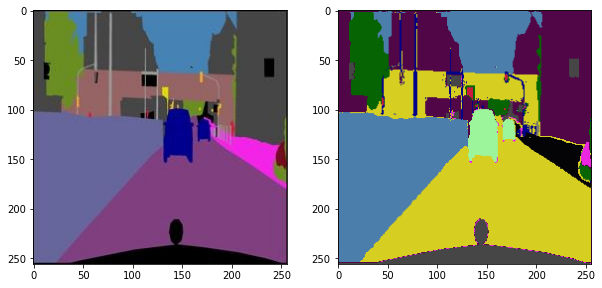

In [14]:
fig,ax=plot.subplots(1,2,figsize=(10,10))
ax[0].imshow(mask)
ax[1].imshow(c)
plot.show()

In [15]:
def DataGenerator(path, batch_size=10, classes=13):
    files = os.listdir(path)
    while True:
        for i in range(0, len(files), batch_size):
            batch_files = files[i : i+batch_size]
            imgs=[]
            segs=[]
            for file in batch_files:
                image, mask = LoadImage(file, path)
                labels = getSegmentationArr(mask, classes)

                imgs.append(image)
                segs.append(labels)

            yield np.array(imgs), np.array(segs)

In [16]:
train_gen = DataGenerator(train_folder, batch_size=batch_size)
val_gen = DataGenerator(valid_folder, batch_size=batch_size)

In [17]:
imgs, segs = next(train_gen)
imgs.shape, segs.shape

((10, 256, 256, 3), (10, 256, 256, 13))

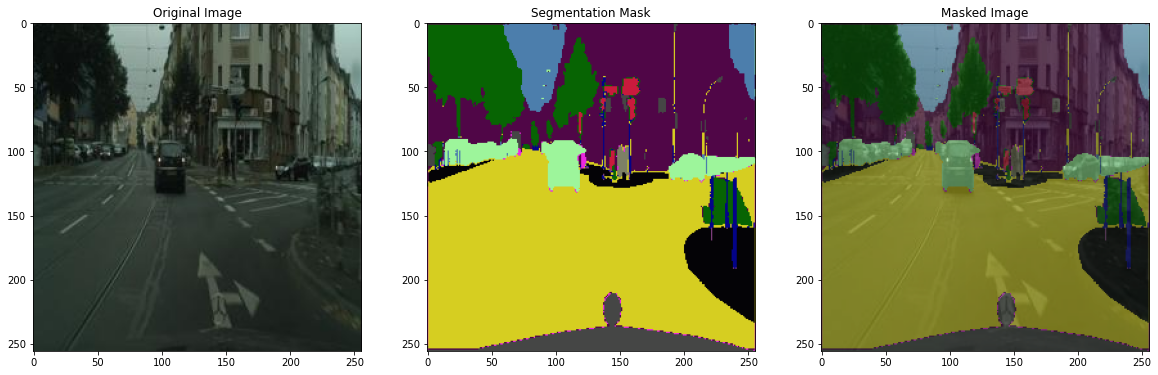

In [18]:
image = imgs[7]
mask = addColors(np.argmax(segs[7], axis=-1))
masked_image = cv2.addWeighted(image, 0.5, mask,0.5, 0)

fig, axs = plot.subplots(1, 3, figsize=(20,20))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(mask)
axs[1].set_title('Segmentation Mask')
#predimg = cv2.addWeighted(imgs[i]/255, 0.6, _p, 0.4, 0)
axs[2].imshow(masked_image)
axs[2].set_title('Masked Image')
plot.show()

In [19]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
import tensorflow
from tensorflow.keras.optimizers import Adam

In [20]:
def segnet(pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    #step1
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1=BatchNormalization()(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1=BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    #step2
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2=BatchNormalization()(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2=BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    #step3
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3=BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3=BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3=BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    #step4
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4=BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4=BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4=BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    #step5
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5=BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5=BatchNormalization()(conv5)
    conv5=BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5=BatchNormalization()(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)

    #step6
    up6 = Conv2D(1024, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool5))
    merge6 = concatenate([conv5,up6], axis = 3)
    conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6=BatchNormalization()(conv6)
    conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6=BatchNormalization()(conv6)
    
    #step7
    up7 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv4,up7], axis = 3)
    conv7 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7=BatchNormalization()(conv7)
    conv7 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7=BatchNormalization()(conv7)
    
    #step8
    up8 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv3,up8], axis = 3)
    conv8 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8=BatchNormalization()(conv8)
    conv8 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8=BatchNormalization()(conv8)

    #step9
    up9 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv2,up9], axis = 3)
    conv9 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9=BatchNormalization()(conv9)
    conv9 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9=BatchNormalization()(conv9)
    
    #step10   
    up10 = Conv2D(64,3,activation='relu',padding='same',kernel_initializer = 'he_normal')(UpSampling2D(size=(2,2))(conv9))
    merge10 = concatenate([conv1,up10],axis=3)
    conv10 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge10)
    conv10=BatchNormalization()(conv10)
    conv10 = Conv2D(13, 1, activation = 'softmax')(conv10)

    model = Model(inputs,conv10)
    opt = tensorflow.keras.optimizers.Adam(lr=0.0001)
    model.compile(optimizer=opt,
             loss="categorical_crossentropy",
             metrics=["accuracy"])    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

In [21]:
model=segnet(pretrained_weights = None,input_size = (256,256,3))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

c:\Users\sande\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [27]:
# import time
# checkpoint_path = "/drive/My Drive/CSE576/cp.ckpt"

# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
import pickle

In [24]:
# history = model.fit_generator(train_gen, epochs=10, steps_per_epoch=num_of_training_samples//batch_size,
#                       validation_data=val_gen, validation_steps=num_of_testing_samples//batch_size)
history = model.fit(train_gen, epochs=10, steps_per_epoch=num_of_training_samples//batch_size,
                      validation_data=val_gen, validation_steps=num_of_testing_samples//batch_size)

# stop = time.time()
# elapsed = stop-start
# print("Time required: ", elapsed)

Epoch 1/10
297/297 [==============================] - 7637s 26s/step - loss: 0.9892 - accuracy: 0.7203 - val_loss: 0.9847 - val_accuracy: 0.7461
Epoch 2/10
297/297 [==============================] - 7293s 25s/step - loss: 0.7564 - accuracy: 0.7837 - val_loss: 0.8821 - val_accuracy: 0.7696
Epoch 3/10
297/297 [==============================] - 9034s 30s/step - loss: 0.6825 - accuracy: 0.8042 - val_loss: 0.8322 - val_accuracy: 0.7770
Epoch 4/10
297/297 [==============================] - 7459s 25s/step - loss: 0.6324 - accuracy: 0.8173 - val_loss: 0.7785 - val_accuracy: 0.7866
Epoch 5/10
297/297 [==============================] - 9866s 33s/step - loss: 0.5925 - accuracy: 0.8276 - val_loss: 0.7468 - val_accuracy: 0.7937
Epoch 6/10
297/297 [==============================] - 7492s 25s/step - loss: 0.5605 - accuracy: 0.8359 - val_loss: 0.7148 - val_accuracy: 0.7995
Epoch 7/10
297/297 [==============================] - 15478s 52s/step - loss: 0.5265 - accuracy: 0.8446 - val_loss: 0.6930 - val_a

In [25]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://fc91fcc8-88b5-440e-9d37-45ceac8d7357/assets


In [30]:
import joblib
# save the model to disk
filename = 'finalized_model_1.sav'
joblib.dump(model, filename)

INFO:tensorflow:Assets written to: ram://09c30b3f-ac52-41df-9aa3-3cd2dd718d14/assets


['finalized_model_1.sav']

In [46]:
import cv2
m='113.jpg'
m,tru=LoadImage(m, valid_folder)
i=np.asarray(m)
i=i.reshape((1,256,256,3))
i.shape

(1, 256, 256, 3)

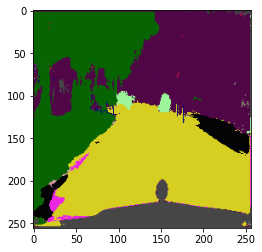

In [47]:
r=model.predict(i)
r=r.reshape((256,256,-1))
s=addColors(np.argmax(r, axis=-1))
plot.imshow(s)

In [39]:
from keras.models import model_from_json

In [40]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [41]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


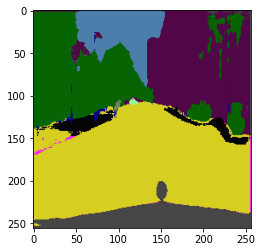

In [44]:
r=loaded_model.predict(i)
r=r.reshape((256,256,-1))
s=addColors(np.argmax(r, axis=-1))
plot.imshow(s)